
 # Diagnostic QPV Occitanie — Notebook reproductible

Ce notebook vise à :
- Identifier les besoins sociaux et territoriaux des QPV d’Occitanie
- Comprendre les déterminants sociaux associés (revenus, emploi, logement, démographie)
- Produire un diagnostic reproductible, lisible et actionnable
- Fournir des sorties exploitables pour les acteurs locaux (cartes, tableaux, fiches QPV)

Sources : INSEE (Filosofi 2021, RP 2020/2021, Logement 2020), DEFM 2022, ANCT (QPV).


In [1]:
import pandas as pd
import geopandas as gpd

print("Kernel OK !")

Kernel OK !


In [2]:
import os
os.getcwd()


'/home/raja/code/jjchabutDataCRM/sante-territoires/notebooks'

In [3]:
os.listdir()


['heatmap_france.ipynb',
 'Diagnostic_QPV_Occitanie.ipynb',
 '03_mortalite_nationale_historique.ipynb',
 '02_mortalite_cleaning.ipynb',
 '01_exploration_APL.ipynb',
 '00-IRIS_load_ref_geom.ipynb',
 'projet_sante.ipynb']

In [4]:
iris = gpd.read_file(
    "../data/geo/CONTOURS-IRIS_3-0_SHP_LAMB93_FXX-ED2023-01-01/CONTOURS-IRIS.shp"
)


In [5]:
iris.shape

(48577, 8)

In [6]:
iris.shape
iris.head()
iris.columns


Index(['ID', 'INSEE_COM', 'NOM_COM', 'IRIS', 'CODE_IRIS', 'NOM_IRIS',
       'TYP_IRIS', 'geometry'],
      dtype='object')

In [7]:
iris.head()

,ID,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry
0,IRIS____0000000012400000,01240,Matafelon-Granges,0000,012400000,Matafelon-Granges,Z,"POLYGON ((895081.8 6573620.15, 895062.8 657373..."
1,IRIS____0000000012660000,01266,Montrevel-en-Bresse,0000,012660000,Montrevel-en-Bresse,Z,"POLYGON ((862068.15 6585230.95, 862267.6 65851..."
2,IRIS____0000000012130000,01213,Leyment,0000,012130000,Leyment,Z,"POLYGON ((877547.1 6541349.8, 877706.44 654133..."
3,IRIS____0000000013970000,01397,Sauverny,0000,013970000,Sauverny,Z,"POLYGON ((938817.15 6583250.3, 938626.45 65834..."
4,IRIS____0000000010610000,01061,Brens,0000,010610000,Brens,Z,"POLYGON ((908843.6 6518470.3, 908934.1 6518520..."


In [9]:
deps_occ = ['09','11','12','30','31','32','34','46','48','65','66','81','82']

iris_occ = iris[iris["INSEE_COM"].str[:2].isin(deps_occ)]


In [10]:
iris_occ.shape


(5450, 8)

In [11]:

# ---------------------------------------------------------
# 1. IMPORT DES DONNÉES GÉOGRAPHIQUES (GEO)
# ---------------------------------------------------------

DATA_RAW = "../data/raw/"
DATA_GEO = "../data/geo/"




# --- Démographie IRIS (geojson) ---
demo = gpd.read_file(
    DATA_GEO + "demographie-recensement-de-la-population-population-par-iris (1).geojson"
)

# --- QPV géographiques ---
qpv_geo = gpd.read_file(DATA_GEO + "ListesQPV.geojson")


# ---------------------------------------------------------
# 2. IMPORT DES DONNÉES BRUTES (RAW)
# ---------------------------------------------------------

# --- REVENUS QPV 2021 ---
revenus_qpv = pd.read_csv(
    DATA_RAW + "data_indic-revenu-declare-qp24-2021_v2_QP24.csv",
    sep=";",
    dtype={"code_qp": "string"}
)



# --- EMPLOI IRIS 2020 (Activité des résidents) ---
emploi = pd.read_excel(
    DATA_RAW + "base-ic-activite-residents-2020.xlsx",
    dtype={"IRIS": "string"}
)

# --- LOGEMENT IRIS 2020 ---
logement = pd.read_csv(
    DATA_RAW + "base-ic-logement-2020.CSV",
    sep=";",
    dtype={"IRIS": "string", "COM": "string", "LAB_IRIS": "string"},
    low_memory=False
)

print("Import terminé.")


Import terminé.


In [12]:
pop = pd.read_excel(
    DATA_RAW + "base-ic-evol-struct-pop-2020.xlsx",
    dtype={"IRIS": "string"}
)


In [13]:
# ---------------------------------------------------------
# 3. INSPECTION DES DONNÉES CHARGÉES
# ---------------------------------------------------------

def inspect(df, name):
    print(f"\n===== {name} =====")
    print("Shape :", df.shape)
    print("Colonnes :", list(df.columns))
    display(df.head(3))

inspect(demo, "Démographie IRIS")
inspect(qpv_geo, "QPV 2024 (géométries)")
inspect(revenus_qpv, "Revenus QPV 2021")
inspect(emploi, "Emploi IRIS 2020")
inspect(logement, "Logement IRIS 2020")




===== Démographie IRIS =====
Shape : (596, 120)
Colonnes : ['actifs_15_64_ans_employes', 'code_insee', 'annee', 'grand_quartiers', 'pop_15_ans_ou_plus_non_scolarisee', 'pop_15_ans_ou_plus_artisans_comm_chefs_entr', 'pop_15_ans_ou_plus_non_scol_sans_diplome_et_bepc', 'men_fam_princ_couple_sans_enfant', 'residences_principales_3_pieces', 'comexcde', 'menage_femme_seule', 'actifs_15_64_ans', 'zoneexcde', 'objectid', 'label_iris', 'pop_18_24_ans', 'pop_15_ans_ou_plus_autres', 'logements', 'pop_80_ans_ou_plus', 'actifs_15_64_ans_cadres_prof_intel_sup', 'couple_sans_enfant', 'non_salaries_15_ans_ou_plus_aides_familiaux', 'menage', 'menages_avec_famille_s', 'non_salaries_15_ans_ou_plus_independants', 'chomeur_15_64_ans', 'fam_1_enfant_moins_25_ans', 'pop_40_54_ans', 'residences_secondaires_occasionnelles', 'maisons', 'autres_inactifs_15_64_ans', 'libelle_iris', 'triiris', 'uniteurbaine', 'salaries_15_ans_ou_plus_apprentissage_stage', 'salaries_15_ans_ou_plus_emplois_aides', 'pop_30_44_ans', 

,actifs_15_64_ans_employes,code_insee,annee,grand_quartiers,pop_15_ans_ou_plus_non_scolarisee,pop_15_ans_ou_plus_artisans_comm_chefs_entr,pop_15_ans_ou_plus_non_scol_sans_diplome_et_bepc,men_fam_princ_couple_sans_enfant,residences_principales_3_pieces,comexcde,...,men_fam_monoparentale,pop_15_ans_ou_plus_non_scol_cap_bep,fam_4_enfants_ou_plus_moins_25_ans,residences_principales,fam_0_enfant_moins_25_ans,population_des_menages,familles_monoparentales,femme_15_64_ans,pop_25_39_ans,geometry
0,487.0,86157,2012,8615700,2829.0,125.0,295.0,569.0,206.0,157.0,...,107.0,531.0,24.0,1688.0,593.0,3930.0,107.0,1376.0,645.0,"MULTIPOLYGON (((0.38953 46.54956, 0.38941 46.5..."
1,30.0,86194,2012,8619401,112.0,3.0,29.0,3.0,14.0,194.0,...,0.0,21.0,1.0,292.0,3.0,338.0,0.0,163.0,54.0,"MULTIPOLYGON (((0.33958 46.59255, 0.33963 46.5..."
2,506.0,86194,2012,8619404,2026.0,17.0,241.0,491.0,504.0,194.0,...,95.0,313.0,6.0,2817.0,517.0,4141.0,95.0,1792.0,645.0,"MULTIPOLYGON (((0.36999 46.57094, 0.36961 46.5..."



===== QPV 2024 (géométries) =====
Shape : (1362, 11)
Colonnes : ['fid', 'code_qp', 'lib_qp', 'insee_reg', 'lib_reg', 'insee_dep', 'lib_dep', 'insee_com', 'lib_com', 'siren_epci', 'geometry']


,fid,code_qp,lib_qp,insee_reg,lib_reg,insee_dep,lib_dep,insee_com,lib_com,siren_epci,geometry
0,1.0,QN00101M,Grande Reyssouze Terre Des Fleurs,84,Auvergne-Rhône-Alpes,01,Ain,01053,Bourg-en-Bresse,200071751,"MULTIPOLYGON (((872426.099 6570361, 872427.525..."
1,2.0,QN00102M,Croix Blanche,84,Auvergne-Rhône-Alpes,01,Ain,01053,Bourg-en-Bresse,200071751,"MULTIPOLYGON (((873155.263 6569611.674, 873151..."
2,3.0,QN00103M,Les Courbes De L'Albarine,84,Auvergne-Rhône-Alpes,01,Ain,01004,Ambérieu-en-Bugey,240100883,"MULTIPOLYGON (((882313.438 6542222.366, 882271..."



===== Revenus QPV 2021 =====
Shape : (1428, 24)
Colonnes : ['CODGEO', 'DEC_Q1_A21', 'DEC_MED_A21', 'DEC_Q3_A21', 'DEC_EQ_A21', 'DEC_D1_A21', 'DEC_D2_A21', 'DEC_D3_A21', 'DEC_D4_A21', 'DEC_D6_A21', 'DEC_D7_A21', 'DEC_D8_A21', 'DEC_D9_A21', 'DEC_RD_A21', 'DEC_GINI_A21', 'DEC_S80S20_A21', 'DEC_PACT_A21', 'DEC_PCHO_A21', 'DEC_PPEN_A21', 'DEC_PAUT_A21', 'DEC_PMIMP_A21', 'DEC_BREV_A21', 'DEC_INCERT_A21', 'DEC_NOTE_A21']


,CODGEO,DEC_Q1_A21,DEC_MED_A21,DEC_Q3_A21,DEC_EQ_A21,DEC_D1_A21,DEC_D2_A21,DEC_D3_A21,DEC_D4_A21,DEC_D6_A21,...,DEC_GINI_A21,DEC_S80S20_A21,DEC_PACT_A21,DEC_PCHO_A21,DEC_PPEN_A21,DEC_PAUT_A21,DEC_PMIMP_A21,DEC_BREV_A21,DEC_INCERT_A21,DEC_NOTE_A21
0,QN00101M,6020.0,10810.0,17490.0,"1,06",1120.0,4680.0,7070.0,8830.0,13290.0,...,"0,397","16,4","64,2","6,9","34,9","0,9",22,61,1,0
1,QN00102M,5290.0,9560.0,14910.0,"1,01",490.0,4450.0,5990.0,7760.0,11340.0,...,"0,391",17,"70,6","8,8","29,1","0,3",15,70,1,0
2,QN00103M,6120.0,10650.0,16980.0,"1,02",260.0,4670.0,6950.0,8810.0,12370.0,...,"0,404","19,6",79,"8,6","20,3","0,7",25,65,2,0



===== Emploi IRIS 2020 =====
Shape : (49278, 126)
Colonnes : ['Données infra-communales    -     Activité des résidents', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', '

,Données infra-communales - Activité des résidents,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125
0,France hors Mayotte – IRIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mise en ligne le 19/10/2023 Géographie a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"@Insee Source(s) : Insee, Recensements d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



===== Logement IRIS 2020 =====
Shape : (49273, 96)
Colonnes : ['IRIS', 'COM', 'TYP_IRIS', 'LAB_IRIS', 'P20_LOG', 'P20_RP', 'P20_RSECOCC', 'P20_LOGVAC', 'P20_MAISON', 'P20_APPART', 'P20_RP_1P', 'P20_RP_2P', 'P20_RP_3P', 'P20_RP_4P', 'P20_RP_5PP', 'P20_NBPI_RP', 'P20_RPMAISON', 'P20_NBPI_RPMAISON', 'P20_RPAPPART', 'P20_NBPI_RPAPPART', 'P20_RP_M30M2', 'P20_RP_3040M2', 'P20_RP_4060M2', 'P20_RP_6080M2', 'P20_RP_80100M2', 'P20_RP_100120M2', 'P20_RP_120M2P', 'P20_RP_ACHTOT', 'P20_RP_ACH19', 'P20_RP_ACH45', 'P20_RP_ACH70', 'P20_RP_ACH90', 'P20_RP_ACH05', 'P20_RP_ACH17', 'P20_RPMAISON_ACHTOT', 'P20_RPMAISON_ACH19', 'P20_RPMAISON_ACH45', 'P20_RPMAISON_ACH70', 'P20_RPMAISON_ACH90', 'P20_RPMAISON_ACH05', 'P20_RPMAISON_ACH17', 'P20_RPAPPART_ACHTOT', 'P20_RPAPPART_ACH19', 'P20_RPAPPART_ACH45', 'P20_RPAPPART_ACH70', 'P20_RPAPPART_ACH90', 'P20_RPAPPART_ACH05', 'P20_RPAPPART_ACH17', 'P20_MEN', 'P20_MEN_ANEM0002', 'P20_MEN_ANEM0204', 'P20_MEN_ANEM0509', 'P20_MEN_ANEM10P', 'P20_PMEN', 'P20_PMEN_ANEM0002

,IRIS,COM,TYP_IRIS,LAB_IRIS,P20_LOG,P20_RP,P20_RSECOCC,P20_LOGVAC,P20_MAISON,P20_APPART,...,P20_RP_GARL,P20_RP_VOIT1P,P20_RP_VOIT1,P20_RP_VOIT2P,P20_RP_HABFOR,P20_RP_CASE,P20_RP_MIBOIS,P20_RP_MIDUR,C20_RP_HSTU1P,C20_RP_HSTU1P_SUROCC
0,010010000,01001,Z,5,366.185065,328.879202,16.414580,20.891283,356.495590,8.197240,...,285.211762,319.775730,104.749023,215.026707,NaN,NaN,NaN,NaN,334.478609,0.000000
1,010020000,01002,Z,5,175.308079,110.875756,48.920838,15.511485,173.619608,1.688471,...,84.347446,105.755796,45.346914,60.408882,NaN,NaN,NaN,NaN,110.160087,0.000000
2,010040101,01004,H,1,910.485969,782.410125,30.335180,97.740664,328.245461,550.401467,...,536.230867,645.126238,405.771594,239.354644,NaN,NaN,NaN,NaN,632.763662,18.121451


In [14]:
inspect(pop, "Population IRIS 2020")



===== Population IRIS 2020 =====
Shape : (49278, 83)
Colonnes : ['Données infra-communales    -     Population', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 

,Données infra-communales - Population,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82
0,France hors Mayotte – IRIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mise en ligne le 19/10/2023 Géographie a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"@Insee Source(s) : Insee, Recensements d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
pop_raw = pd.read_excel(DATA_RAW + "base-ic-evol-struct-pop-2020.xlsx", header=None)
pop_raw.iloc[0:10]


,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,Données infra-communales - Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,France hors Mayotte – IRIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Mise en ligne le 19/10/2023 Géographie a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"@Insee Source(s) : Insee, Recensements d...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IRIS,Région,Département,Unité urbaine,Commune ou ARM,Libellé commune ou ARM,TRIRIS,Grand quartier,Libellé de l'IRIS,Type d'IRIS,...,Pop 15 ans ou plus Femmes Prof. intermédiaires...,Pop 15 ans ou plus Femmes Employés en 2020 (co...,Pop 15 ans ou plus Femmes Ouvriers en 2020 (co...,Pop 15 ans ou plus Femmes Retraités en 2020 (c...,Pop 15 ans ou plus Femmes Autres en 2020 (compl),Pop Français en 2020 (princ),Pop Etrangers en 2020 (princ),Pop Immigrés en 2020 (princ),Pop ménages en 2020 (princ),Pop hors ménages en 2020 (princ)
5,IRIS,REG,DEP,UU2020,COM,LIBCOM,TRIRIS,GRD_QUART,LIBIRIS,TYP_IRIS,...,C20_F15P_CS4,C20_F15P_CS5,C20_F15P_CS6,C20_F15P_CS7,C20_F15P_CS8,P20_POP_FR,P20_POP_ETR,P20_POP_IMM,P20_PMEN,P20_PHORMEN
6,010010000,84,01,01000,01001,L'Abergement-Clémenciat,ZZZZZZ,0100100,L'Abergement-Clémenciat (commune non irisée),Z,...,46.590055,79.69568,28.079284,82.546801,28.071601,796.562592,9.437408,17.783541,806,0
7,010020000,84,01,01000,01002,L'Abergement-de-Varey,ZZZZZZ,0100200,L'Abergement-de-Varey (commune non irisée),Z,...,24.305648,14.371604,4.493918,22.196847,4.493918,260.981319,1.018681,2.7617,262,0
8,010040101,84,01,01303,01004,Ambérieu-en-Bugey,ZZZZZZ,0100401,Les Pérouses-Triangle d'Activités,H,...,102.223408,239.751222,51.887787,169.925225,186.025416,1550.387323,254.989286,213.675617,1442.38312,362.99349
9,010040102,84,01,01303,01004,Ambérieu-en-Bugey,ZZZZZZ,0100401,Longeray-Gare,H,...,180.432551,402.975969,154.584388,420.664788,310.793231,3170.910863,462.226695,575.389845,3633.137558,0


In [16]:
# ---------------------------------------------------------
# Nettoyage POP IRIS 2020
# ---------------------------------------------------------

# On lit le fichier en sautant les 4 lignes de métadonnées
pop_clean = pd.read_excel(
    DATA_RAW + "base-ic-evol-struct-pop-2020.xlsx",
    skiprows=4,
    dtype={"IRIS": "string"}
)

# On supprime les lignes sans IRIS
pop_clean = pop_clean[pop_clean["IRIS"].notna()]

# On garde uniquement les IRIS valides (9 caractères)
pop_clean = pop_clean[pop_clean["IRIS"].str.len() == 9]

print("POP nettoyé :", pop_clean.shape)
display(pop_clean.head())


POP nettoyé : (49273, 83)


,IRIS,Région,Département,Unité urbaine,Commune ou ARM,Libellé commune ou ARM,TRIRIS,Grand quartier,Libellé de l'IRIS,Type d'IRIS,...,Pop 15 ans ou plus Femmes Prof. intermédiaires en 2020 (compl),Pop 15 ans ou plus Femmes Employés en 2020 (compl),Pop 15 ans ou plus Femmes Ouvriers en 2020 (compl),Pop 15 ans ou plus Femmes Retraités en 2020 (compl),Pop 15 ans ou plus Femmes Autres en 2020 (compl),Pop Français en 2020 (princ),Pop Etrangers en 2020 (princ),Pop Immigrés en 2020 (princ),Pop ménages en 2020 (princ),Pop hors ménages en 2020 (princ)
1,010010000,84,01,01000,01001,L'Abergement-Clémenciat,ZZZZZZ,0100100,L'Abergement-Clémenciat (commune non irisée),Z,...,46.590055,79.69568,28.079284,82.546801,28.071601,796.562592,9.437408,17.783541,806,0
2,010020000,84,01,01000,01002,L'Abergement-de-Varey,ZZZZZZ,0100200,L'Abergement-de-Varey (commune non irisée),Z,...,24.305648,14.371604,4.493918,22.196847,4.493918,260.981319,1.018681,2.7617,262,0
3,010040101,84,01,01303,01004,Ambérieu-en-Bugey,ZZZZZZ,0100401,Les Pérouses-Triangle d'Activités,H,...,102.223408,239.751222,51.887787,169.925225,186.025416,1550.387323,254.989286,213.675617,1442.38312,362.99349
4,010040102,84,01,01303,01004,Ambérieu-en-Bugey,ZZZZZZ,0100401,Longeray-Gare,H,...,180.432551,402.975969,154.584388,420.664788,310.793231,3170.910863,462.226695,575.389845,3633.137558,0
5,010040201,84,01,01303,01004,Ambérieu-en-Bugey,ZZZZZZ,0100402,Centre-Saint-Germain-Vareilles,H,...,254.897967,396.638516,170.174486,529.191909,323.199708,3690.08231,407.646411,424.023175,4009.730299,87.998422


In [17]:
pop_clean.shape

(49273, 83)

In [18]:
pop_clean.shape
pop_clean.head()


,IRIS,Région,Département,Unité urbaine,Commune ou ARM,Libellé commune ou ARM,TRIRIS,Grand quartier,Libellé de l'IRIS,Type d'IRIS,...,Pop 15 ans ou plus Femmes Prof. intermédiaires en 2020 (compl),Pop 15 ans ou plus Femmes Employés en 2020 (compl),Pop 15 ans ou plus Femmes Ouvriers en 2020 (compl),Pop 15 ans ou plus Femmes Retraités en 2020 (compl),Pop 15 ans ou plus Femmes Autres en 2020 (compl),Pop Français en 2020 (princ),Pop Etrangers en 2020 (princ),Pop Immigrés en 2020 (princ),Pop ménages en 2020 (princ),Pop hors ménages en 2020 (princ)
1,010010000,84,01,01000,01001,L'Abergement-Clémenciat,ZZZZZZ,0100100,L'Abergement-Clémenciat (commune non irisée),Z,...,46.590055,79.69568,28.079284,82.546801,28.071601,796.562592,9.437408,17.783541,806,0
2,010020000,84,01,01000,01002,L'Abergement-de-Varey,ZZZZZZ,0100200,L'Abergement-de-Varey (commune non irisée),Z,...,24.305648,14.371604,4.493918,22.196847,4.493918,260.981319,1.018681,2.7617,262,0
3,010040101,84,01,01303,01004,Ambérieu-en-Bugey,ZZZZZZ,0100401,Les Pérouses-Triangle d'Activités,H,...,102.223408,239.751222,51.887787,169.925225,186.025416,1550.387323,254.989286,213.675617,1442.38312,362.99349
4,010040102,84,01,01303,01004,Ambérieu-en-Bugey,ZZZZZZ,0100401,Longeray-Gare,H,...,180.432551,402.975969,154.584388,420.664788,310.793231,3170.910863,462.226695,575.389845,3633.137558,0
5,010040201,84,01,01303,01004,Ambérieu-en-Bugey,ZZZZZZ,0100402,Centre-Saint-Germain-Vareilles,H,...,254.897967,396.638516,170.174486,529.191909,323.199708,3690.08231,407.646411,424.023175,4009.730299,87.998422


In [19]:
deps_occ = ["09", "11", "12", "30", "31", "32", "34", "46", "48", "65", "66", "81", "82"]

pop_clean = pop_clean[pop_clean["IRIS"].str[:2].isin(deps_occ)]
print("POP Occitanie :", pop_clean.shape)


POP Occitanie : (5448, 83)


In [20]:
emploi.columns


Index(['Données infra-communales    -     Activité des résidents',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 116', 'Unnamed: 117', 'Unnamed: 118', 'Unnamed: 119',
       'Unnamed: 120', 'Unnamed: 121', 'Unnamed: 122', 'Unnamed: 123',
       'Unnamed: 124', 'Unnamed: 125'],
      dtype='object', length=126)

In [21]:
# ---------------------------------------------------------
# Nettoyage EMPLOI IRIS 2020
# ---------------------------------------------------------

emploi_clean = pd.read_excel(
    DATA_RAW + "base-ic-activite-residents-2020.xlsx",
    skiprows=4,              # saute les métadonnées
    dtype={"IRIS": "string"} # assure que IRIS est bien une string
)

# Supprimer les lignes sans IRIS
emploi_clean = emploi_clean[emploi_clean["IRIS"].notna()]

# Garder uniquement les IRIS valides (9 caractères)
emploi_clean = emploi_clean[emploi_clean["IRIS"].str.len() == 9]

print("EMPLOI nettoyé :", emploi_clean.shape)
display(emploi_clean.head())


EMPLOI nettoyé : (49273, 126)


,IRIS,Région,Département,Unité urbaine,Commune ou ARM,Libellé commune ou ARM,TRIRIS,Grand quartier,Libellé de l'IRIS,Type d'IRIS,...,Actif occ 15 ans ou plus travaille autre dépt même région résidence en 2020 (princ),Actif occ 15 ans ou plus travaille autre région en métropole en 2020 (princ),Actif occ 15 ans ou plus travaille autre région hors métropole en 2020 (princ),Actif occ 15 ans ou plus en 2020 (compl),Actifs occ 15 ans ou plus pas de transport pour travail en 2020 (compl),Actifs occ 15 ans ou plus marche à pied pour travail en 2020 (compl),Actifs occ 15 ans ou plus vélo en 2020 (compl),Actifs occ 15 ans ou plus deux-roues motorisé en 2020 (compl),Actifs occ 15 ans ou plus voiture en 2020 (compl),Actifs occ 15 ans ou plus transport en commun en 2020 (compl)
1,010010000,84,01,01000,01001,L'Abergement-Clémenciat,ZZZZZZ,0100100,L'Abergement-Clémenciat (commune non irisée),Z,...,92.791845,12.25216,0,422.81946,18.940721,0,0,9.729435,389.540577,4.608727
2,010020000,84,01,01000,01002,L'Abergement-de-Varey,ZZZZZZ,0100200,L'Abergement-de-Varey (commune non irisée),Z,...,9.292752,4.682689,0,110.628015,4.493918,0,0,0,101.912921,4.221177
3,010040101,84,01,01303,01004,Ambérieu-en-Bugey,ZZZZZZ,0100401,Les Pérouses-Triangle d'Activités,H,...,161.47316,14.955242,0,861.500757,69.187991,88.508341,11.193253,17.46447,571.962639,103.184063
4,010040102,84,01,01303,01004,Ambérieu-en-Bugey,ZZZZZZ,0100401,Longeray-Gare,H,...,280.240368,13.17167,4.481953,1535.392542,61.344473,101.672245,38.223826,28.243731,1033.347091,272.561175
5,010040201,84,01,01303,01004,Ambérieu-en-Bugey,ZZZZZZ,0100402,Centre-Saint-Germain-Vareilles,H,...,260.387636,12.450212,1.003983,1637.741925,40.249694,188.911416,67.192388,14.860365,1105.357135,221.170927


In [23]:
# Liste des départements Occitanie
deps_occ = ["09", "11", "12", "30", "31", "32", "34", "46", "48", "65", "66", "81", "82"]

# Filtrer uniquement les IRIS Occitanie
emploi_clean = emploi_clean[emploi_clean["IRIS"].str[:2].isin(deps_occ)]

print("EMPLOI Occitanie :", emploi_clean.shape)
display(emploi_clean.head())


EMPLOI Occitanie : (5448, 126)


,IRIS,Région,Département,Unité urbaine,Commune ou ARM,Libellé commune ou ARM,TRIRIS,Grand quartier,Libellé de l'IRIS,Type d'IRIS,...,Actif occ 15 ans ou plus travaille autre dépt même région résidence en 2020 (princ),Actif occ 15 ans ou plus travaille autre région en métropole en 2020 (princ),Actif occ 15 ans ou plus travaille autre région hors métropole en 2020 (princ),Actif occ 15 ans ou plus en 2020 (compl),Actifs occ 15 ans ou plus pas de transport pour travail en 2020 (compl),Actifs occ 15 ans ou plus marche à pied pour travail en 2020 (compl),Actifs occ 15 ans ou plus vélo en 2020 (compl),Actifs occ 15 ans ou plus deux-roues motorisé en 2020 (compl),Actifs occ 15 ans ou plus voiture en 2020 (compl),Actifs occ 15 ans ou plus transport en commun en 2020 (compl)
3452,090010000,76,09,09000,09001,Aigues-Juntes,ZZZZZZ,0900100,Aigues-Juntes (commune non irisée),Z,...,0,1,0,35,5,0,0,0,30,0
3453,090020000,76,09,09000,09002,Aigues-Vives,ZZZZZZ,0900200,Aigues-Vives (commune non irisée),Z,...,33,4,0,280,5,5,5,5,260,0
3454,090030000,76,09,09000,09003,L'Aiguillon,ZZZZZZ,0900300,L'Aiguillon (commune non irisée),Z,...,12,3,0,110,0,0,0,0,110,0
3455,090040000,76,09,09000,09004,Albiès,ZZZZZZ,0900400,Albiès (commune non irisée),Z,...,0,1.967213,1.967213,44.262295,0,0,9.836066,0,34.42623,0
3456,090050000,76,09,09000,09005,Aleu,ZZZZZZ,0900500,Aleu (commune non irisée),Z,...,2.865672,0.955224,0,33.432836,4.776119,0,0,0,28.656716,0


In [25]:
# ---------------------------------------------------------
# Nettoyage LOGEMENT IRIS 2020
# ---------------------------------------------------------

logement_clean = logement.copy()

# Supprimer les lignes sans IRIS
logement_clean = logement_clean[logement_clean["IRIS"].notna()]

# Garder uniquement les IRIS valides (9 caractères)
logement_clean = logement_clean[logement_clean["IRIS"].str.len() == 9]

print("LOGEMENT nettoyé :", logement_clean.shape)
display(logement_clean.head())


LOGEMENT nettoyé : (49273, 96)


,IRIS,COM,TYP_IRIS,LAB_IRIS,P20_LOG,P20_RP,P20_RSECOCC,P20_LOGVAC,P20_MAISON,P20_APPART,...,P20_RP_GARL,P20_RP_VOIT1P,P20_RP_VOIT1,P20_RP_VOIT2P,P20_RP_HABFOR,P20_RP_CASE,P20_RP_MIBOIS,P20_RP_MIDUR,C20_RP_HSTU1P,C20_RP_HSTU1P_SUROCC
0,010010000,01001,Z,5,366.185065,328.879202,16.414580,20.891283,356.495590,8.197240,...,285.211762,319.775730,104.749023,215.026707,NaN,NaN,NaN,NaN,334.478609,0.000000
1,010020000,01002,Z,5,175.308079,110.875756,48.920838,15.511485,173.619608,1.688471,...,84.347446,105.755796,45.346914,60.408882,NaN,NaN,NaN,NaN,110.160087,0.000000
2,010040101,01004,H,1,910.485969,782.410125,30.335180,97.740664,328.245461,550.401467,...,536.230867,645.126238,405.771594,239.354644,NaN,NaN,NaN,NaN,632.763662,18.121451
3,010040102,01004,H,1,2121.966857,1848.091522,15.418785,258.456550,513.225470,1595.595026,...,1272.485496,1514.265258,1077.010497,437.254761,NaN,NaN,NaN,NaN,1747.967656,83.382321
4,010040201,01004,H,1,2305.463344,2043.969224,29.187625,232.306495,758.006032,1531.681115,...,1387.598901,1656.304455,1131.651499,524.652955,NaN,NaN,NaN,NaN,1994.367976,56.532453


In [26]:
# Liste des départements Occitanie
deps_occ = ["09", "11", "12", "30", "31", "32", "34", "46", "48", "65", "66", "81", "82"]

# Filtrer uniquement les IRIS Occitanie
logement_clean = logement_clean[logement_clean["IRIS"].str[:2].isin(deps_occ)]

print("LOGEMENT Occitanie :", logement_clean.shape)
display(logement_clean.head())


LOGEMENT Occitanie : (5448, 96)


,IRIS,COM,TYP_IRIS,LAB_IRIS,P20_LOG,P20_RP,P20_RSECOCC,P20_LOGVAC,P20_MAISON,P20_APPART,...,P20_RP_GARL,P20_RP_VOIT1P,P20_RP_VOIT1,P20_RP_VOIT2P,P20_RP_HABFOR,P20_RP_CASE,P20_RP_MIBOIS,P20_RP_MIDUR,C20_RP_HSTU1P,C20_RP_HSTU1P_SUROCC
3451,090010000,09001,Z,5,43.000000,30.000000,9.000000,4.000000,42.000000,1.000000,...,21.000000,29.000000,13.000000,16.000000,NaN,NaN,NaN,NaN,30.000000,5.000000
3452,090020000,09002,Z,5,308.000000,282.000000,16.000000,10.000000,294.000000,13.000000,...,240.000000,276.000000,120.000000,156.000000,NaN,NaN,NaN,NaN,285.000000,0.000000
3453,090030000,09003,Z,5,273.000000,195.000000,28.000000,50.000000,257.000000,16.000000,...,146.000000,177.000000,96.000000,81.000000,NaN,NaN,NaN,NaN,195.000000,0.000000
3454,090040000,09004,Z,5,153.666667,60.000000,89.722807,3.943860,138.891343,6.889963,...,41.311475,53.114754,22.622951,30.491803,NaN,NaN,NaN,NaN,59.016393,0.000000
3455,090050000,09005,Z,5,246.109489,74.507463,148.787884,22.814142,235.491940,5.768039,...,45.850746,64.000000,41.074627,22.925373,NaN,NaN,NaN,NaN,76.417910,4.776119


In [27]:
revenus_qpv.columns


Index(['CODGEO', 'DEC_Q1_A21', 'DEC_MED_A21', 'DEC_Q3_A21', 'DEC_EQ_A21',
       'DEC_D1_A21', 'DEC_D2_A21', 'DEC_D3_A21', 'DEC_D4_A21', 'DEC_D6_A21',
       'DEC_D7_A21', 'DEC_D8_A21', 'DEC_D9_A21', 'DEC_RD_A21', 'DEC_GINI_A21',
       'DEC_S80S20_A21', 'DEC_PACT_A21', 'DEC_PCHO_A21', 'DEC_PPEN_A21',
       'DEC_PAUT_A21', 'DEC_PMIMP_A21', 'DEC_BREV_A21', 'DEC_INCERT_A21',
       'DEC_NOTE_A21'],
      dtype='object')

In [28]:
# ---------------------------------------------------------
# Nettoyage REVENUS QPV 2021 + Filtre Occitanie
# ---------------------------------------------------------

revenus_clean = revenus_qpv.copy()

# Renommage de la colonne QPV
revenus_clean = revenus_clean.rename(columns={
    "CODGEO": "QPV_CODE"
})

# Harmonisation du type
revenus_clean["QPV_CODE"] = revenus_clean["QPV_CODE"].astype("string")

# Liste des préfixes QPV Occitanie
prefixes_occ = [
    "QN009", "QN011", "QN012", "QN030", "QN031", "QN032",
    "QN034", "QN046", "QN048", "QN065", "QN066", "QN081", "QN082"
]

# Filtre Occitanie
revenus_clean = revenus_clean[
    revenus_clean["QPV_CODE"].str[:5].isin(prefixes_occ)
].copy()

# Suppression des doublons éventuels
revenus_clean = revenus_clean.drop_duplicates(subset="QPV_CODE")

print("REVENUS Occitanie nettoyé :", revenus_clean.shape)
display(revenus_clean.head())


REVENUS Occitanie nettoyé : (108, 24)


,QPV_CODE,DEC_Q1_A21,DEC_MED_A21,DEC_Q3_A21,DEC_EQ_A21,DEC_D1_A21,DEC_D2_A21,DEC_D3_A21,DEC_D4_A21,DEC_D6_A21,...,DEC_GINI_A21,DEC_S80S20_A21,DEC_PACT_A21,DEC_PCHO_A21,DEC_PPEN_A21,DEC_PAUT_A21,DEC_PMIMP_A21,DEC_BREV_A21,DEC_INCERT_A21,DEC_NOTE_A21
61,QN00901M,3950.0,11980.0,20490.0,"1,38",0.0,1380.0,5810.0,8930.0,15310.0,...,"0,487",216,"62,8","6,4","32,8","4,4",27,55,2,0
62,QN00902M,4650.0,11880.0,20200.0,"1,31",0.0,2770.0,6170.0,9280.0,14960.0,...,"0,49","74,9","65,4","6,4","31,1","3,5",25,57,2,0
63,QN00903I,4590.0,11080.0,18190.0,"1,23",0.0,2870.0,6260.0,8730.0,13820.0,...,"0,457","56,9","65,4","6,5","31,3","3,3",23,60,1,0
74,QN01101I,4110.0,11420.0,18480.0,"1,26",0.0,2620.0,5670.0,9020.0,14280.0,...,"0,477","71,7",60,"6,1","37,2","2,8",21,57,2,0
75,QN01102I,1860.0,6250.0,12130.0,"1,64",0.0,920.0,2520.0,4500.0,7960.0,...,"0,546","145,5","67,6",9,"29,3","3,1",17,77,2,0


In [29]:
# ---------------------------------------------------------
# Fusion IRIS : POP + EMPLOI + LOGEMENT
# ---------------------------------------------------------

iris_full = pop_clean.copy()

# Fusion avec EMPLOI
iris_full = iris_full.merge(
    emploi_clean,
    on="IRIS",
    how="left",
    suffixes=("", "_EMP")
)

# Fusion avec LOGEMENT
iris_full = iris_full.merge(
    logement_clean,
    on="IRIS",
    how="left",
    suffixes=("", "_LOG")
)

print("Fusion IRIS complète :", iris_full.shape)
display(iris_full.head())


Fusion IRIS complète : (5448, 303)


,IRIS,Région,Département,Unité urbaine,Commune ou ARM,Libellé commune ou ARM,TRIRIS,Grand quartier,Libellé de l'IRIS,Type d'IRIS,...,P20_RP_GARL,P20_RP_VOIT1P,P20_RP_VOIT1,P20_RP_VOIT2P,P20_RP_HABFOR,P20_RP_CASE,P20_RP_MIBOIS,P20_RP_MIDUR,C20_RP_HSTU1P,C20_RP_HSTU1P_SUROCC
0,090010000,76,09,09000,09001,Aigues-Juntes,ZZZZZZ,0900100,Aigues-Juntes (commune non irisée),Z,...,21.000000,29.000000,13.000000,16.000000,NaN,NaN,NaN,NaN,30.000000,5.000000
1,090020000,76,09,09000,09002,Aigues-Vives,ZZZZZZ,0900200,Aigues-Vives (commune non irisée),Z,...,240.000000,276.000000,120.000000,156.000000,NaN,NaN,NaN,NaN,285.000000,0.000000
2,090030000,76,09,09000,09003,L'Aiguillon,ZZZZZZ,0900300,L'Aiguillon (commune non irisée),Z,...,146.000000,177.000000,96.000000,81.000000,NaN,NaN,NaN,NaN,195.000000,0.000000
3,090040000,76,09,09000,09004,Albiès,ZZZZZZ,0900400,Albiès (commune non irisée),Z,...,41.311475,53.114754,22.622951,30.491803,NaN,NaN,NaN,NaN,59.016393,0.000000
4,090050000,76,09,09000,09005,Aleu,ZZZZZZ,0900500,Aleu (commune non irisée),Z,...,45.850746,64.000000,41.074627,22.925373,NaN,NaN,NaN,NaN,76.417910,4.776119


In [30]:
# ---------------------------------------------------------
# Jointure spatiale IRIS → QPV (correcte)
# ---------------------------------------------------------

# Harmonisation des CRS
iris = iris.to_crs(qpv_geo.crs)

# Jointure spatiale : on part des IRIS (49273 lignes)
iris_qpv = gpd.sjoin(
    iris,
    qpv_geo[["code_qp", "geometry"]],
    how="left",          # IMPORTANT : left = garder tous les IRIS
    predicate="intersects"
)

# Renommage
iris_qpv = iris_qpv.rename(columns={"code_qp": "QPV_CODE"})

print("Jointure IRIS → QPV :", iris_qpv.shape)
display(iris_qpv.head())


Jointure IRIS → QPV : (49105, 10)


,ID,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS,geometry,index_right,QPV_CODE
0,IRIS____0000000012400000,01240,Matafelon-Granges,0000,012400000,Matafelon-Granges,Z,"POLYGON ((895081.8 6573620.15, 895062.8 657373...",NaN,NaN
1,IRIS____0000000012660000,01266,Montrevel-en-Bresse,0000,012660000,Montrevel-en-Bresse,Z,"POLYGON ((862068.15 6585230.95, 862267.6 65851...",NaN,NaN
2,IRIS____0000000012130000,01213,Leyment,0000,012130000,Leyment,Z,"POLYGON ((877547.1 6541349.8, 877706.44 654133...",NaN,NaN
3,IRIS____0000000013970000,01397,Sauverny,0000,013970000,Sauverny,Z,"POLYGON ((938817.15 6583250.3, 938626.45 65834...",NaN,NaN
4,IRIS____0000000010610000,01061,Brens,0000,010610000,Brens,Z,"POLYGON ((908843.6 6518470.3, 908934.1 6518520...",NaN,NaN


In [31]:
iris_occ = iris[iris["INSEE_COM"].str[:2].isin(deps_occ)]
iris_occ = iris_occ.to_crs(qpv_geo.crs)

iris_qpv = gpd.sjoin(
    iris_occ,
    qpv_geo[["code_qp", "geometry"]],
    how="left",
    predicate="intersects"
)

iris_qpv = iris_qpv.rename(columns={"code_qp": "QPV_CODE"})


In [32]:
print(iris_qpv["QPV_CODE"].notna().sum())



455


In [33]:
print(iris_qpv["QPV_CODE"].value_counts(dropna=False))


QPV_CODE
NaN         5017
QN03107M      24
QN03401M      15
QN03001I      13
QN03003M      12
            ... 
QN01203N       1
QN03002M       1
QN03119N       1
QN03116N       1
QN08204M       1
Name: count, Length: 109, dtype: int64


In [34]:
iris_occ["INSEE_COM"].str[:2].value_counts().sort_index()


INSEE_COM
09    340
11    493
12    319
30    475
31    849
32    476
34    578
46    324
48    158
65    508
66    313
81    388
82    229
Name: count, dtype: int64

In [35]:
# ---------------------------------------------------------
# Fusion finale : IRIS + QPV + POP + EMPLOI + LOGEMENT + REVENUS QPV
# ---------------------------------------------------------

# 1) Fusion IRIS + QPV + indicateurs IRIS
iris_final = iris_qpv.merge(
    iris_full,
    on="IRIS",
    how="left"
)

# 2) Fusion avec les revenus QPV (niveau QPV)
iris_final = iris_final.merge(
    revenus_clean,
    on="QPV_CODE",
    how="left",
    suffixes=("", "_REV")
)

print("Table finale :", iris_final.shape)
display(iris_final.head())


Table finale : (5472, 335)


,ID,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS_x,geometry,index_right,QPV_CODE,...,DEC_GINI_A21,DEC_S80S20_A21,DEC_PACT_A21,DEC_PCHO_A21,DEC_PPEN_A21,DEC_PAUT_A21,DEC_PMIMP_A21,DEC_BREV_A21,DEC_INCERT_A21,DEC_NOTE_A21
0,IRIS____0000000091760000,09176,Luzenac,0000,091760000,Luzenac,Z,"POLYGON ((595958.2 6176858.6, 595974.6 6177082...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IRIS____0000000091140000,09114,Erp,0000,091140000,Erp,Z,"POLYGON ((552773 6203295.7, 552751.8 6203283, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IRIS____0000000091300000,09130,Ganac,0000,091300000,Ganac,Z,"POLYGON ((584369.2 6207549.8, 584372.3 6207541...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IRIS____0000000090190000,09019,Artigat,0000,090190000,Artigat,Z,"POLYGON ((576432.5 6227401.1, 576501.15 622729...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IRIS____0000000091310000,09131,Garanou,0000,091310000,Garanou,Z,"POLYGON ((597849 6186438.8, 598095.6 6186283.1...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
iris_final["INSEE_COM"].str[:2].value_counts()


INSEE_COM
31    855
34    582
65    509
11    495
30    478
32    476
81    388
09    340
46    324
12    319
66    318
82    230
48    158
Name: count, dtype: int64

In [37]:
iris_final["QPV_CODE"].notna().sum()


np.int64(455)

In [38]:
iris_final.filter(like="_REV").head()


""
0
1
2
3
4


In [39]:
revenus_clean.columns


Index(['QPV_CODE', 'DEC_Q1_A21', 'DEC_MED_A21', 'DEC_Q3_A21', 'DEC_EQ_A21',
       'DEC_D1_A21', 'DEC_D2_A21', 'DEC_D3_A21', 'DEC_D4_A21', 'DEC_D6_A21',
       'DEC_D7_A21', 'DEC_D8_A21', 'DEC_D9_A21', 'DEC_RD_A21', 'DEC_GINI_A21',
       'DEC_S80S20_A21', 'DEC_PACT_A21', 'DEC_PCHO_A21', 'DEC_PPEN_A21',
       'DEC_PAUT_A21', 'DEC_PMIMP_A21', 'DEC_BREV_A21', 'DEC_INCERT_A21',
       'DEC_NOTE_A21'],
      dtype='object')

In [40]:
list(revenus_clean.columns)


['QPV_CODE',
 'DEC_Q1_A21',
 'DEC_MED_A21',
 'DEC_Q3_A21',
 'DEC_EQ_A21',
 'DEC_D1_A21',
 'DEC_D2_A21',
 'DEC_D3_A21',
 'DEC_D4_A21',
 'DEC_D6_A21',
 'DEC_D7_A21',
 'DEC_D8_A21',
 'DEC_D9_A21',
 'DEC_RD_A21',
 'DEC_GINI_A21',
 'DEC_S80S20_A21',
 'DEC_PACT_A21',
 'DEC_PCHO_A21',
 'DEC_PPEN_A21',
 'DEC_PAUT_A21',
 'DEC_PMIMP_A21',
 'DEC_BREV_A21',
 'DEC_INCERT_A21',
 'DEC_NOTE_A21']

In [41]:
for col in revenus_clean.columns:
    print(col)


QPV_CODE
DEC_Q1_A21
DEC_MED_A21
DEC_Q3_A21
DEC_EQ_A21
DEC_D1_A21
DEC_D2_A21
DEC_D3_A21
DEC_D4_A21
DEC_D6_A21
DEC_D7_A21
DEC_D8_A21
DEC_D9_A21
DEC_RD_A21
DEC_GINI_A21
DEC_S80S20_A21
DEC_PACT_A21
DEC_PCHO_A21
DEC_PPEN_A21
DEC_PAUT_A21
DEC_PMIMP_A21
DEC_BREV_A21
DEC_INCERT_A21
DEC_NOTE_A21


In [42]:
# ---------------------------------------------------------
# Fusion finale : IRIS + QPV + POP + EMPLOI + LOGEMENT + REVENUS QPV
# ---------------------------------------------------------

# 1) Fusion IRIS + QPV + indicateurs IRIS
iris_final = iris_qpv.merge(
    iris_full,
    on="IRIS",
    how="left"
)

# 2) Fusion avec les revenus QPV (niveau QPV)
iris_final = iris_final.merge(
    revenus_clean,
    on="QPV_CODE",
    how="left",
    suffixes=("", "_REV")
)

print("Table finale :", iris_final.shape)
display(iris_final.head())


Table finale : (5472, 335)


,ID,INSEE_COM,NOM_COM,IRIS,CODE_IRIS,NOM_IRIS,TYP_IRIS_x,geometry,index_right,QPV_CODE,...,DEC_GINI_A21,DEC_S80S20_A21,DEC_PACT_A21,DEC_PCHO_A21,DEC_PPEN_A21,DEC_PAUT_A21,DEC_PMIMP_A21,DEC_BREV_A21,DEC_INCERT_A21,DEC_NOTE_A21
0,IRIS____0000000091760000,09176,Luzenac,0000,091760000,Luzenac,Z,"POLYGON ((595958.2 6176858.6, 595974.6 6177082...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IRIS____0000000091140000,09114,Erp,0000,091140000,Erp,Z,"POLYGON ((552773 6203295.7, 552751.8 6203283, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IRIS____0000000091300000,09130,Ganac,0000,091300000,Ganac,Z,"POLYGON ((584369.2 6207549.8, 584372.3 6207541...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IRIS____0000000090190000,09019,Artigat,0000,090190000,Artigat,Z,"POLYGON ((576432.5 6227401.1, 576501.15 622729...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IRIS____0000000091310000,09131,Garanou,0000,091310000,Garanou,Z,"POLYGON ((597849 6186438.8, 598095.6 6186283.1...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
iris_final.filter(like="DEC_").columns


Index(['DEC_Q1_A21', 'DEC_MED_A21', 'DEC_Q3_A21', 'DEC_EQ_A21', 'DEC_D1_A21',
       'DEC_D2_A21', 'DEC_D3_A21', 'DEC_D4_A21', 'DEC_D6_A21', 'DEC_D7_A21',
       'DEC_D8_A21', 'DEC_D9_A21', 'DEC_RD_A21', 'DEC_GINI_A21',
       'DEC_S80S20_A21', 'DEC_PACT_A21', 'DEC_PCHO_A21', 'DEC_PPEN_A21',
       'DEC_PAUT_A21', 'DEC_PMIMP_A21', 'DEC_BREV_A21', 'DEC_INCERT_A21',
       'DEC_NOTE_A21'],
      dtype='object')

In [44]:
iris_final[[
    'DEC_MED_A21', 'DEC_Q1_A21', 'DEC_Q3_A21',
    'DEC_GINI_A21', 'DEC_PCHO_A21', 'DEC_BREV_A21'
]].head()


,DEC_MED_A21,DEC_Q1_A21,DEC_Q3_A21,DEC_GINI_A21,DEC_PCHO_A21,DEC_BREV_A21
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
iris_final["QPV_CODE"].dropna().unique()[:10]


array(['QN00901M', 'QN00903I', 'QN00902M', 'QN01101I', 'QN01102I',
       'QN01105I', 'QN01106M', 'QN01107I', 'QN01108I', 'QN01110I'],
      dtype=object)

In [46]:
revenus_clean["QPV_CODE"].unique()[:10]


<StringArray>
['QN00901M', 'QN00902M', 'QN00903I', 'QN01101I', 'QN01102I', 'QN01103I',
 'QN01104I', 'QN01105I', 'QN01106M', 'QN01107I']
Length: 10, dtype: string

In [47]:
revenus_clean["QPV_CODE"].head(20)


61     QN00901M
62     QN00902M
63     QN00903I
74     QN01101I
75     QN01102I
76     QN01103I
77     QN01104I
78     QN01105I
79     QN01106M
80     QN01107I
81     QN01108I
82     QN01109I
83     QN01110I
84     QN01201M
85     QN01202M
86     QN01203N
87     QN01204N
88     QN01205N
274    QN03001I
275    QN03002M
Name: QPV_CODE, dtype: string

In [48]:
iris_final = iris_qpv.merge(
    iris_full,
    on="IRIS",
    how="left"
)


In [49]:
iris_final = iris_final.merge(
    revenus_clean,
    on="QPV_CODE",
    how="left",
    suffixes=("", "_REV")
)


In [50]:
print("IRIS avec revenus :", iris_final["DEC_MED_A21"].notna().sum())
print("IRIS en QPV :", iris_final["QPV_CODE"].notna().sum())


IRIS avec revenus : 442
IRIS en QPV : 455


In [51]:
iris_final[[
    "IRIS", "QPV_CODE",
    "DEC_MED_A21", "DEC_Q1_A21", "DEC_Q3_A21"
]].head(20)


,IRIS,QPV_CODE,DEC_MED_A21,DEC_Q1_A21,DEC_Q3_A21
0,0000,NaN,NaN,NaN,NaN
1,0000,NaN,NaN,NaN,NaN
2,0000,NaN,NaN,NaN,NaN
3,0000,NaN,NaN,NaN,NaN
4,0000,NaN,NaN,NaN,NaN
5,0000,NaN,NaN,NaN,NaN
6,0000,NaN,NaN,NaN,NaN
7,0000,NaN,NaN,NaN,NaN
8,0000,NaN,NaN,NaN,NaN
9,0000,NaN,NaN,NaN,NaN


In [52]:
iris_qpv[iris_qpv["IRIS"] == "0000"].shape


(4284, 10)

In [53]:
iris_qpv = iris_qpv[iris_qpv["IRIS"] != "0000"]


In [54]:
iris_final = iris_qpv.merge(
    iris_full,
    on="IRIS",
    how="left"
)

iris_final = iris_final.merge(
    revenus_clean,
    on="QPV_CODE",
    how="left",
    suffixes=("", "_REV")
)


In [56]:
print("IRIS en QPV :", iris_final["QPV_CODE"].notna().sum())
print("IRIS avec revenus :", iris_final["DEC_MED_A21"].notna().sum())


IRIS en QPV : 450
IRIS avec revenus : 437


In [57]:
manquants = iris_final[
    iris_final["QPV_CODE"].notna() &
    iris_final["DEC_MED_A21"].isna()
][["IRIS", "QPV_CODE"]]

manquants


,IRIS,QPV_CODE
294,0104,QN03101M
309,0103,QN03101M
483,0109,QN03101M
503,0101,QN03101M
605,1103,QN03410M
667,1201,QN03410M
734,1203,QN03410M
749,1202,QN03410M
821,1301,QN03410M
1160,0301,QN08201I


In [58]:
revenus_qpv[revenus_qpv["CODGEO"].isin(["QN03101M", "QN03410M", "QN08201I"])]


,CODGEO,DEC_Q1_A21,DEC_MED_A21,DEC_Q3_A21,DEC_EQ_A21,DEC_D1_A21,DEC_D2_A21,DEC_D3_A21,DEC_D4_A21,DEC_D6_A21,...,DEC_GINI_A21,DEC_S80S20_A21,DEC_PACT_A21,DEC_PCHO_A21,DEC_PPEN_A21,DEC_PAUT_A21,DEC_PMIMP_A21,DEC_BREV_A21,DEC_INCERT_A21,DEC_NOTE_A21
291,QN03101M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,5
345,QN03410M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,5
1042,QN08201I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,5


In [59]:
iris_final_revenus = iris_final[iris_final["DEC_MED_A21"].notna()]


In [60]:
iris_final["DEP"] = iris_final["IRIS"].str[:2]


In [61]:
revenu_dep = iris_final.groupby("DEP")["DEC_MED_A21"].transform("median")
iris_final["DEC_MED_A21"] = iris_final["DEC_MED_A21"].fillna(revenu_dep)


In [62]:
# Indicateurs revenus
iris_final["revenu_median"] = iris_final["DEC_MED_A21"]
iris_final["revenu_q1"] = iris_final["DEC_Q1_A21"]
iris_final["revenu_q3"] = iris_final["DEC_Q3_A21"]

# Indicateur bas revenus (Q1 / médian)
iris_final["taux_bas_revenus"] = iris_final["revenu_q1"] / iris_final["revenu_median"]

# QPV vs hors QPV
iris_final["is_qpv"] = iris_final["QPV_CODE"].notna().astype(int)


In [63]:
revenus_qpv = iris_final[iris_final["is_qpv"] == 1]["revenu_median"].median()
revenus_hors = iris_final[iris_final["is_qpv"] == 0]["revenu_median"].median()

ecart = revenus_hors - revenus_qpv
ratio = revenus_qpv / revenus_hors


In [64]:
# Calcul des revenus QPV / hors QPV
revenus_qpv = iris_final[iris_final["is_qpv"] == 1]["revenu_median"].median()
revenus_hors = iris_final[iris_final["is_qpv"] == 0]["revenu_median"].median()

# Écart absolu
ecart_absolu = revenus_hors - revenus_qpv

# Écart relatif
ecart_relatif = ecart_absolu / revenus_hors

# Ratio QPV / hors QPV
ratio_qpv_hors = revenus_qpv / revenus_hors

# Affichage
print("Revenu médian QPV :", revenus_qpv)
print("Revenu médian hors QPV :", revenus_hors)
print("Écart absolu :", ecart_absolu)
print("Écart relatif :", ecart_relatif)
print("Ratio QPV / hors QPV :", ratio_qpv_hors)


Revenu médian QPV : 9860.0
Revenu médian hors QPV : 10850.0
Écart absolu : 990.0
Écart relatif : 0.0912442396313364
Ratio QPV / hors QPV : 0.9087557603686636


In [66]:
iris_final.to_file(
    "../data/processed/iris_final.geojson",
    driver="GeoJSON"
)


In [67]:
iris_final.to_parquet(
    "../data/processed/iris_final.parquet",
    index=False
)


In [69]:
import os
os.getcwd()


'/home/raja/code/jjchabutDataCRM/sante-territoires/notebooks'

In [71]:
import os
os.chdir("..")


In [72]:
os.getcwd()


'/home/raja/code/jjchabutDataCRM/sante-territoires'

In [73]:
iris = pd.read_parquet("data/processed/iris_final.parquet")


In [75]:
import os
os.makedirs("../data/processed", exist_ok=True)


In [76]:
iris_final.to_csv(
    "../data/processed/iris_final.csv",
    index=False,
    encoding="utf-8"
)


In [78]:
# Sauvegarde GeoJSON
iris_final.to_file("../data/processed/iris_final.geojson", driver="GeoJSON")

# Sauvegarde Parquet (recommandé pour Streamlit)
iris_final.to_parquet("../data/processed/iris_final.parquet", index=False)



In [79]:
os.listdir("../data/processed")


['iris_final.geojson', 'iris_final.csv', 'iris_final.parquet']

In [65]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

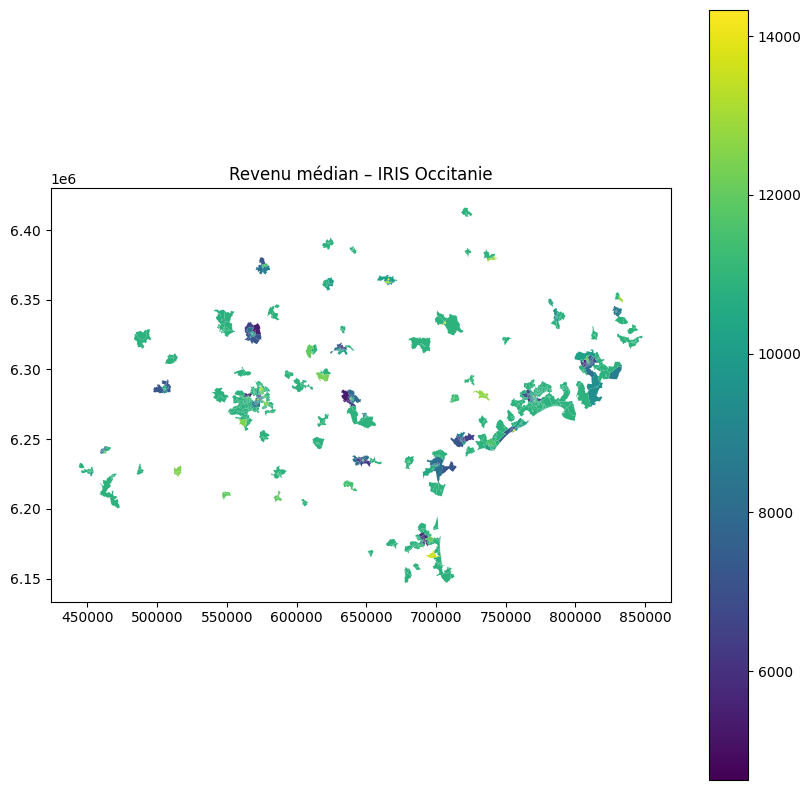

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
iris_final.plot(column="revenu_median", cmap="viridis", legend=True, ax=ax)
plt.title("Revenu médian – IRIS Occitanie")
plt.show()


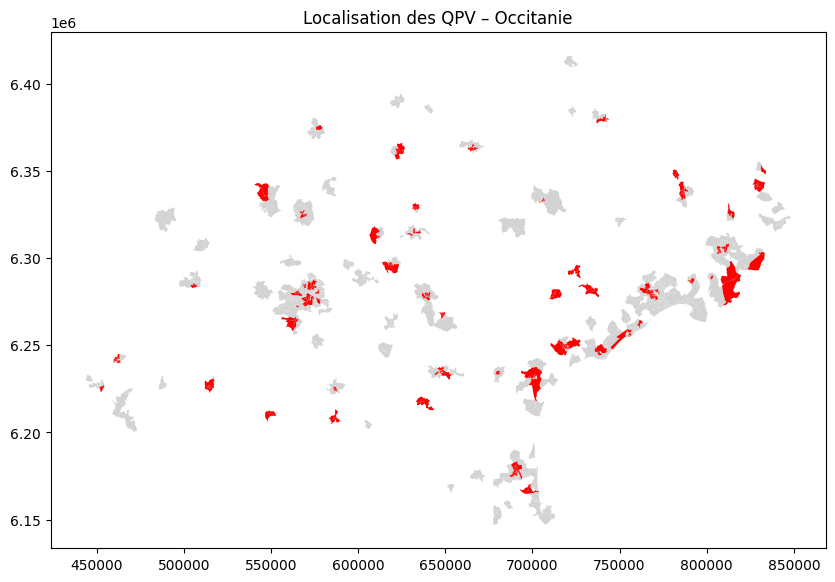

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
iris_final.plot(color="lightgrey", ax=ax)
iris_final[iris_final["is_qpv"] == 1].plot(color="red", ax=ax)
plt.title("Localisation des QPV – Occitanie")
plt.show()


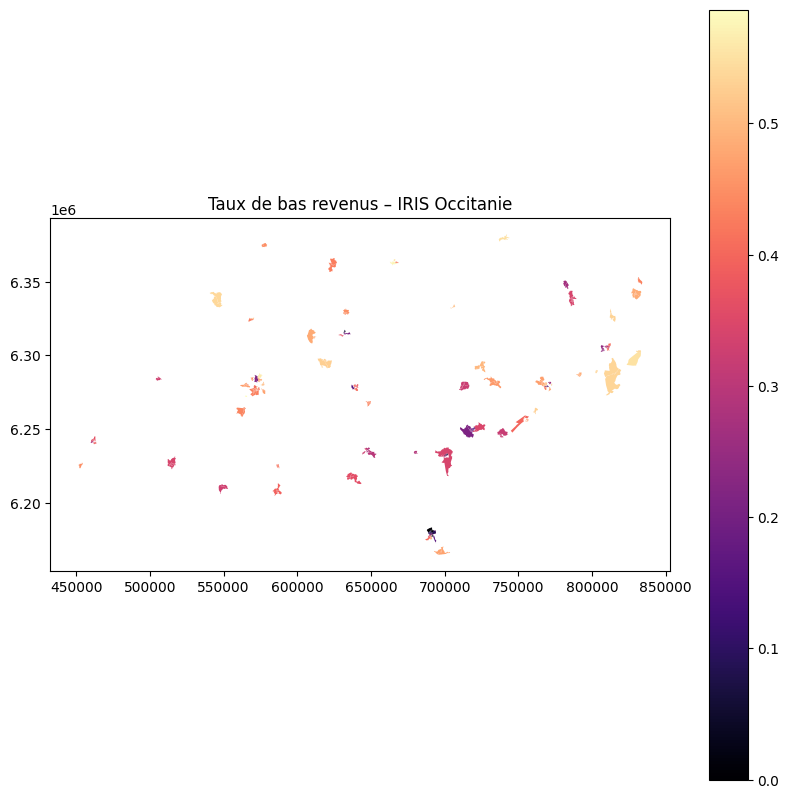

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
iris_final.plot(column="taux_bas_revenus", cmap="magma", legend=True, ax=ax)
plt.title("Taux de bas revenus – IRIS Occitanie")
plt.show()


In [83]:
iris_tlse = iris_final[iris_final["DEP"] == "31"]


In [84]:
iris_tlse = iris_final[iris_final["IRIS"].str.startswith("31555")]


In [85]:
qpv_tlse = iris_tlse[iris_tlse["is_qpv"] == 1]


In [86]:
revenus_qpv_tlse = qpv_tlse["revenu_median"].median()
revenus_hors_tlse = iris_tlse[iris_tlse["is_qpv"] == 0]["revenu_median"].median()

ecart_tlse = revenus_hors_tlse - revenus_qpv_tlse
ratio_tlse = revenus_qpv_tlse / revenus_hors_tlse

print("Revenu médian QPV Toulouse :", revenus_qpv_tlse)
print("Revenu médian hors QPV Toulouse :", revenus_hors_tlse)
print("Écart absolu Toulouse :", ecart_tlse)
print("Ratio QPV / hors QPV Toulouse :", ratio_tlse)


Revenu médian QPV Toulouse : nan
Revenu médian hors QPV Toulouse : nan
Écart absolu Toulouse : nan
Ratio QPV / hors QPV Toulouse : nan


In [87]:
iris_tlse.shape


(0, 341)

In [88]:
iris_final["IRIS"].str[:5].value_counts().head(30)


IRIS
0101    168
0102    163
0103    103
0104     65
0105     45
0106     28
0301     20
0201     19
0107     18
0401     17
0501     16
0402     14
0601     13
0302     12
0108     12
0701     12
0202     12
0801     11
0403     10
0602     10
0203     10
0109     10
0901      9
0502      8
1001      8
0702      8
0902      8
0603      7
0503      7
0303      7
Name: count, dtype: int64

In [89]:
iris_final.columns


Index(['ID', 'INSEE_COM', 'NOM_COM', 'IRIS', 'CODE_IRIS', 'NOM_IRIS',
       'TYP_IRIS_x', 'geometry', 'index_right', 'QPV_CODE',
       ...
       'DEC_PMIMP_A21', 'DEC_BREV_A21', 'DEC_INCERT_A21', 'DEC_NOTE_A21',
       'DEP', 'revenu_median', 'revenu_q1', 'revenu_q3', 'taux_bas_revenus',
       'is_qpv'],
      dtype='object', length=341)

In [90]:
for col in iris_final.columns:
    try:
        print(col, iris_final[col].astype(str).str.contains("TOULOUSE", case=False, na=False).sum())
    except:
        pass


ID 0
INSEE_COM 0
NOM_COM 158
IRIS 0
CODE_IRIS 0
NOM_IRIS 0
TYP_IRIS_x 0
geometry 0
index_right 0
QPV_CODE 0
Région 0
Département 0
Unité urbaine 0
Commune ou ARM 0
Libellé commune ou ARM 0
TRIRIS 0
Grand quartier 0
Libellé de l'IRIS 0
Type d'IRIS 0
Label de l'IRIS 0
Population en 2020 (princ) 0
Pop 0-2 ans en 2020 (princ) 0
Pop 3-5 ans en 2020 (princ) 0
Pop 6-10 ans en 2020 (princ) 0
Pop 11-17 ans en 2020 (princ) 0
Pop 18-24 ans en 2020 (princ) 0
Pop 25-39 ans en 2020 (princ) 0
Pop 40-54 ans en 2020 (princ) 0
Pop 55-64 ans en 2020 (princ) 0
Pop 65-79 ans en 2020 (princ) 0
Pop 80 ans ou plus en 2020 (princ) 0
Pop 0-14 ans en 2020 (princ) 0
Pop 15-29 ans en 2020 (princ) 0
Pop 30-44 ans en 2020 (princ) 0
Pop 45-59 ans en 2020 (princ) 0
Pop 60-74 ans en 2020 (princ) 0
Pop 75 ans ou plus en 2020 (princ) 0
Pop 0-19 ans en 2020 (princ) 0
Pop 20-64 ans en 2020 (princ) 0
Pop 65 ans ou plus en 2020 (princ) 0
Pop Hommes en 2020 (princ) 0
Pop Hommes 0-14 ans en 2020 (princ) 0
Pop Hommes 15-29 ans 

In [91]:
iris_tlse = iris_final[iris_final["NOM_COM"].str.contains("TOULOUSE", case=False, na=False)]


In [92]:
iris_tlse.shape


(158, 341)

In [93]:
iris_tlse = iris_final[iris_final["NOM_COM"].str.contains("TOULOUSE", case=False, na=False)]


In [94]:
iris_tlse = iris_final[iris_final["INSEE_COM"].astype(str) == "31555"]


In [95]:
iris_tlse.shape


(158, 341)

In [96]:
iris_tlse = iris_final[iris_final["NOM_COM"].str.contains("TOULOUSE", case=False, na=False)]
print(iris_tlse.shape)


(158, 341)


In [97]:
revenus_qpv_tlse = iris_tlse[iris_tlse["is_qpv"] == 1]["revenu_median"].median()
revenus_hors_tlse = iris_tlse[iris_tlse["is_qpv"] == 0]["revenu_median"].median()

ecart_tlse = revenus_hors_tlse - revenus_qpv_tlse
ratio_tlse = revenus_qpv_tlse / revenus_hors_tlse

print("Revenu médian QPV Toulouse :", revenus_qpv_tlse)
print("Revenu médian hors QPV Toulouse :", revenus_hors_tlse)
print("Écart absolu Toulouse :", ecart_tlse)
print("Ratio QPV / hors QPV Toulouse :", ratio_tlse)


Revenu médian QPV Toulouse : 10130.0
Revenu médian hors QPV Toulouse : 10130.0
Écart absolu Toulouse : 0.0
Ratio QPV / hors QPV Toulouse : 1.0


In [99]:
import folium
from folium.features import GeoJsonTooltip, GeoJsonPopup

# Centre de Toulouse
center = [43.6045, 1.4440]

# Carte de base
m = folium.Map(location=center, zoom_start=12, tiles="cartodbpositron")

# Conversion en WGS84
gdf = iris_tlse.to_crs(epsg=4326)

# Style des IRIS
def style_function(feature):
    return {
        "fillColor": "#3186cc",
        "color": "black",
        "weight": 0.5,
        "fillOpacity": 0.6,
    }

# Style au survol
def highlight_function(feature):
    return {
        "weight": 3,
        "color": "yellow",
        "fillOpacity": 0.9,
    }

# Ajout des IRIS avec titres
folium.GeoJson(
    gdf,
    name="IRIS Toulouse",
    style_function=style_function,
    highlight_function=highlight_function,
    tooltip=GeoJsonTooltip(
        fields=["NOM_IRIS", "revenu_median"],
        aliases=["Quartier :", "Revenu médian :"],
        localize=True,
        sticky=True
    ),
    popup=GeoJsonPopup(
        fields=["NOM_IRIS", "NOM_COM", "revenu_median", "is_qpv"],
        aliases=["Quartier :", "Commune :", "Revenu médian :", "QPV :"],
        localize=True
    )
).add_to(m)

m
